<a href="https://colab.research.google.com/github/Zulfatinnafisah/Kelas-Mahir-4.0/blob/main/Clustering_FinalProject_KMPD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi Notebook

```
Nama Ketua : 1. Zulfatin Nafisah (2015015025) ([K-Means] Clustering)
             2. Irma Binti Sya'idah (2000015034) ([DBSCAN] Clustering)
             3. Isni Rahmawati (2000015012) ([Fuzzy-Cmeans] Clustering)
             4. Sintia Afriyani (2000015036) ([K-Medoid] Clustering)
             5. Maya Rajuningsih (2000015028) ([Birch] Clustering)
             
```

# Import Librarry

In [330]:
!pip install Kmedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [332]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from fcmeans import FCM
import kmedoids
from sklearn.datasets import make_blobs
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

# Import Data

In [333]:
# Membuat file csv menjadi bentuk dataframe  
data = pd.read_csv('https://raw.githubusercontent.com/irmabintisyaidah/Belajar-Python/main/DataSet%20Clustering.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [334]:
#Melihat jumlah baris dan kolom data
data.shape

(1599, 11)

In [335]:
#describe dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


In [336]:
#melihat info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   object 
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
dtypes: float64(9), object(2)
memory usage: 137.5+ KB


In [337]:
data.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5       4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.9948   3.39  0.60       10.6       4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11         4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1       4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5        3
                                                                           

In [338]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Preprocessing Data

Check missing value

In [339]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [340]:
data_null = round(100*(data.isnull().sum())/len(data), 2)
data_null

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64

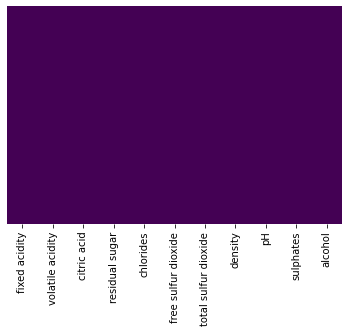

In [341]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Pada data ini tidak ditemukan adanya missing value.

Check Outlier

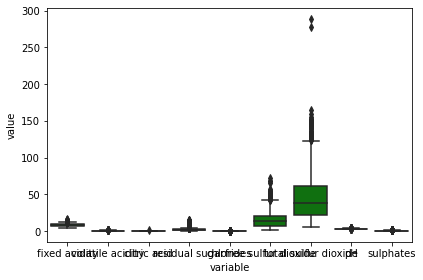

In [342]:
data_num=data.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(data_num))
plt.tight_layout()


Terdapat outlier pada variabel density dan alcohol

The Correlation of Numeric Data

<ipython-input-343-bbbf5e5e9cd1>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


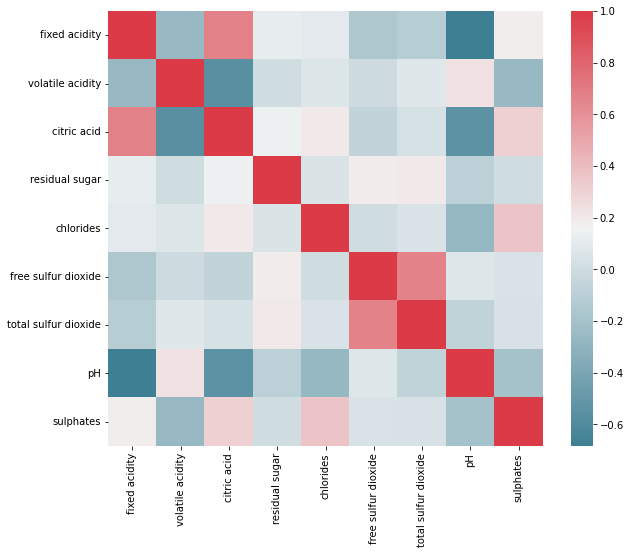

In [343]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Model

### [K-Means] Model ke 1

Metode K-Means akan optimal pada data dengan Mean=0 dan STD=1

In [344]:
X= data.iloc[:, [3,4]].values

In [345]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

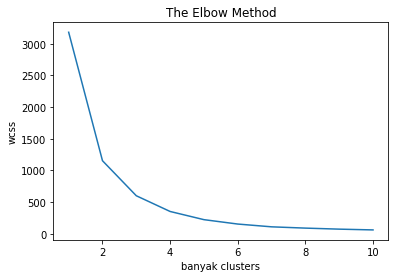

In [346]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('banyak clusters')
plt.ylabel('wcss')
plt.show()

Berdasarkan Metode Elbow diatas diperoleh nilai clustering terbaik yaitu k=2.

In [347]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

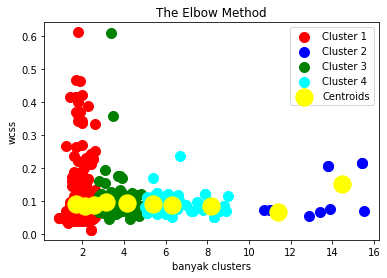

In [348]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('The Elbow Method')
plt.xlabel('banyak clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


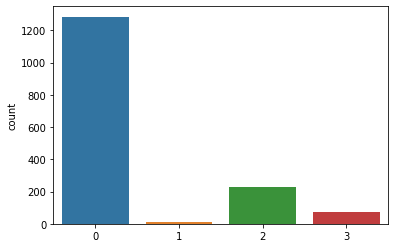

In [349]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
label_kmeans  = kmeans.labels_
sns.countplot(label_kmeans)

In [350]:
data_klaster=data.copy()
data_klaster['K Means Cluster']=label_kmeans

In [351]:
data_klaster[data_klaster['K Means Cluster']==0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,K Means Cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,0


In [352]:
data_klaster[data_klaster['K Means Cluster']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,K Means Cluster
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,1
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,10.015,3.16,0.69,9.2,1
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,10.015,3.16,0.69,9.2,1
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,10.026,3.12,0.66,9.2,1
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,1
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,1
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,100.369,3.18,0.77,9,1
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,100.369,3.18,0.77,9,1
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,100.242,3.16,0.75,8.8,1
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,100.242,3.16,0.75,8.8,1


### [DBSCAN] Model ke 2

In [353]:
X= data.iloc[:, [3,4]].values

In [354]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


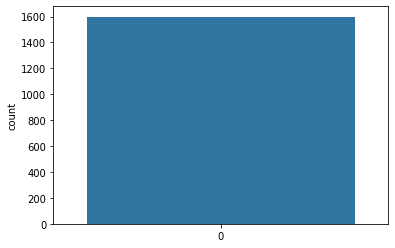

In [355]:
sns.countplot(np.array(dbscan.labels_))

In [356]:
data_klaster=data.copy()
data_klaster['DBSCAN Cluster']=dbscan.labels_

In [357]:
data_klaster[data_klaster['DBSCAN Cluster']==0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,DBSCAN Cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [358]:
data_klaster[data_klaster['DBSCAN Cluster']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,DBSCAN Cluster


### [FUZZY C-Means] Model ke 3

In [359]:
X= data.iloc[:, [3,4]].values

In [360]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


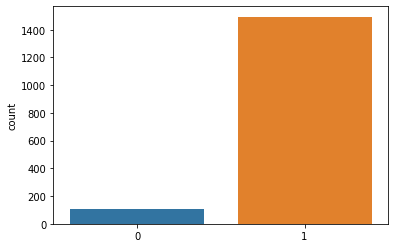

In [361]:
label_fcm = fcm.predict(X)
sns.countplot(np.array(label_fcm))

In [362]:
data_klaster=data.copy()
data_klaster['FCM Cluster']=label_fcm

In [363]:
data_klaster[data_klaster['FCM Cluster']==0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,FCM Cluster
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9,0
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,0
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.9986,3.40,0.55,9.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1540,6.2,0.520,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,0
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,0
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,0
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,0


In [364]:
data_klaster[data_klaster['FCM Cluster']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,FCM Cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


### [K-Medoid] Model ke 4

In [365]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [366]:
x = data.iloc [ :, 2:7]
x.head()

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.00,1.9,0.076,11.0,34.0
1,0.00,2.6,0.098,25.0,67.0
2,0.04,2.3,0.092,15.0,54.0
3,0.56,1.9,0.075,17.0,60.0
4,0.00,1.9,0.076,11.0,34.0


In [367]:
x = np.array(data_num)

In [368]:
def plot_graphs(data, k_medoids):
    colors = {0:'b*', 1:'g^',2:'ro',3:'c*', 4:'m^', 5:'yo', 6:'ko', 7:'w*'}
    index = 0
    for key in k_medoids.clusters.keys():
        temp_data = k_medoids.clusters[key]
        x = [data[i][0] for i in temp_data]
        y = [data[i][1] for i in temp_data]
        plt.plot(x, y, colors[index])
        index += 1
    plt.title('Cluster formations')
    plt.show()

    medoid_data_points = []
    for m in k_medoids.medoids:
        medoid_data_points.append(data[m])   
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    x_ = [i[0] for i in medoid_data_points]
    y_ = [i[1] for i in medoid_data_points]
    plt.plot(x, y, 'yo')
    plt.plot(x_, y_, 'r*')
    plt.title('Mediods are highlighted in red')
    plt.show()

In [369]:
class KMedoidsClass:
    def __init__(self,data,k,iters):
        self.data= data
        self.k = k
        self.iters = iters
        self.medoids = np.array([data[i] for i in range(self.k)])
        self.colors = np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        self.colors[:,3]=1

In [370]:
class KMedoidsClass:
    def __init__(self,data,k,iters):
        self.data= data
        self.k = k
        self.iters = iters
        self.medoids = np.array([data[i] for i in range(self.k)])
        self.colors = np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        self.colors[:,3]=1

    def manhattan(self,p1, p2):
        return np.abs((p1[0]-p2[0])) + np.abs((p1[1]-p2[1]))

    def get_costs(self, medoids, data):
        tmp_clusters = {i:[] for i in range(len(medoids))}
        cst = 0
        for d in data:
            dst = np.array([self.manhattan(d, md) for md in medoids])
            c = dst.argmin()
            tmp_clusters[c].append(d)
            cst+=dst.min()

        tmp_clusters = {k:np.array(v) for k,v in tmp_clusters.items()}
        return tmp_clusters, cst

    def fit(self):

        samples,_ = self.data.shape

        self.clusters, cost = self.get_costs(data=self.data, medoids=self.medoids)
        count = 0

        colors =  np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        colors[:,3]=1

        plt.title(f"Step : 0")
        [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
        plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
        plt.show()

        while True:
            swap = False
            for i in range(samples):
                if not i in self.medoids:
                    for j in range(self.k):
                        tmp_meds = self.medoids.copy()
                        tmp_meds[j] = i
                        clusters_, cost_ = self.get_costs(data=self.data, medoids=tmp_meds)

                        if cost_<cost:
                            self.medoids = tmp_meds
                            cost = cost_
                            swap = True
                            self.clusters = clusters_
                            print(f"Medoids Changed to: {self.medoids}.")
                            plt.title(f"Step : {count+1}")  
                            [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
                            plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
                            plt.show()
            count+=1

            if count>=self.iters:
                print("End of the iterations.")
                break
            if not swap:
                print("No changes.")
                break

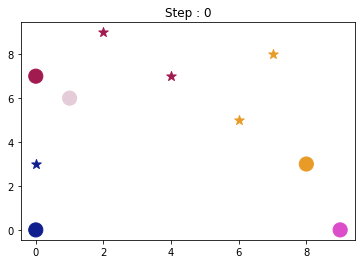

Medoids Changed to: [[0 0]
 [5 5]
 [0 7]
 [1 6]
 [9 0]].


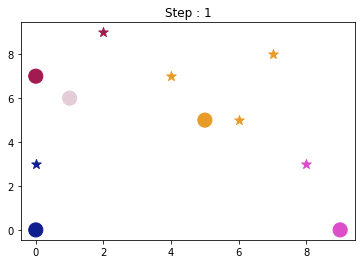

Medoids Changed to: [[0 0]
 [5 5]
 [8 8]
 [1 6]
 [9 0]].


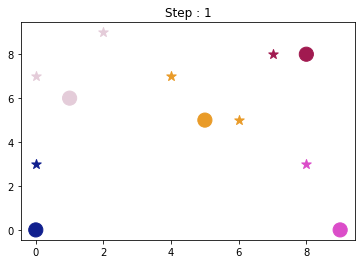

No changes.


In [371]:
dt = np.random.randint(0,10, (10,2))
kmedoid = KMedoidsClass(dt,5,5)
kmedoid.fit()

In [372]:
def init_medoids (X, k):
  from numpy.random import choice 
  from numpy.random import seed
  
  seed(1)
  samples = choice(len(X), size=k, replace=False) 
  return X[samples, :]
  

In [373]:
def compute_d_p(X, medoids, p): 
  m= len(X)
  medoids_shape = medoids.shape 
  # If a 1-D array is provided,
  # it will be reshaped to a single row 2-D array 
  if len(medoids_shape) == 1: 
    medoids = medoids.reshape((1,len (medoids)))
  k = len(medoids)
  S = np.empty((m, k))

  for i in range(m):
    d_i = np.linalg.norm(X[i,:]-medoids, ord=p, axis=1) 
    s[i,:]=d_i**p
  return S

In [374]:
def assign_labels(s):
  return np.argmin(s,axis=1)

In [375]:
def update_medoids (X, medoids, p):
  S = compute_d_p(points, medoids, p) 
  labels = assign_labels (S)
  out_medoids = medoids

  for i in set (labels):
    avg_dissimilarity = np.sum(compute_d_p(points,medoids[i], p))
    cluster_points = points[labels == i]
    for datap in cluster_points:
      new_medoid = datap
      new_dissimilarity= np.sum(compute_d_p(points, datap, p))

      if new_dissimilarity < avg_dissimilarity: 
        avg_dissimilarity = new_dissimilarity
        out_medoids[i] = datap
  return out_medoids

In [376]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [377]:
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)


###[BIRCH] Model ke 5

In [378]:
from sklearn.cluster import Birch
birch = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

In [379]:
birch.fit(X)

Birch(n_clusters=None, threshold=1.5)

In [380]:
label_birch = birch.predict(X)
label_birch

array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


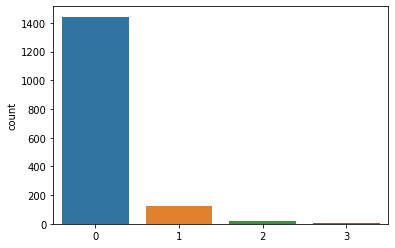

In [381]:
sns.countplot(np.array(label_birch))

In [382]:
data_klaster=data.copy()
data_klaster['Birch Cluster']=label_fcm

In [383]:
data_klaster[data_klaster['Birch Cluster']==0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Birch Cluster
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9,0
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,0
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.9986,3.40,0.55,9.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1540,6.2,0.520,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,0
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,0
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,0
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,0


In [384]:
data_klaster[data_klaster['Birch Cluster']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Birch Cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


### Evaluasi Model

K-Means

In [385]:
DBI_kmeans=metrics.davies_bouldin_score(X, label_kmeans)
DBI_kmeans

0.49781029147107836

In [386]:
SS_kmeans=metrics.silhouette_score(X, label_kmeans, metric='euclidean', sample_size=None, random_state=None)
SS_kmeans

0.6373170659306556

Fuzzy C-Means

In [387]:
DBI_fcm=metrics.davies_bouldin_score(X, label_fcm)
DBI_fcm

0.49942047483091456

In [388]:
SS_fcm=metrics.silhouette_score(X, label_fcm, metric='euclidean', sample_size=None, random_state=None)
SS_fcm

0.8300555286294308

###DBSCAN

###K-Medoid

###Birch

In [391]:
DBI_birch=metrics.davies_bouldin_score(X, label_birch)
DBI_birch

0.4093514122784872

In [392]:
SS_birch=metrics.silhouette_score(X, label_birch, metric='euclidean', sample_size=None, random_state=None)
SS_birch

0.7731396285538831

# Kesimpulan

Buatlah hasil evaluasi dalam bentuk tabel.

In [393]:
dict_evaluation = {'Clustering Method':['K Means', 'FCM','Birch'],
                  'Silhouette Score':[SS_kmeans, SS_fcm, SS_birch],
                  'DBI':[DBI_kmeans, DBI_fcm,DBI_birch]}

df_evaluation = pd.DataFrame(dict_evaluation)

df_evaluation

,Clustering Method,Silhouette Score,DBI
0,K Means,0.637317,0.497810
1,FCM,0.830056,0.499420
2,Birch,0.773140,0.409351


DBI mewakili sebaran cluster, sehingga kami menempatkan kriteria ini sebagai kriteria utama untuk menentukan cluster terbaik. Berdasarkan tabel akhir, kami memilih model **FCM** sebagai model terbaik dengan nilai Silhouette Score yaitu 0.830056 dan juga dengan nilai DBI yang paling tinggi yaitu dengan nilai 0.499420